Forrest Fire Prediction using SVR, Random Forest, and Deep Neural Networks
Data Available at: http://archive.ics.uci.edu/ml/datasets/Forest+Fires

X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: "jan" to "dec"

day - day of the week: "mon" to "sun"

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84

Refrences: 
1. https://github.com/Sagnik220/Forest-Fire-Prediction/blob/main/Notebooks/ForestFire_PyCARET.ipynb
2. https://github.com/maxpeng041/wildfire-prediction/blob/master/wildfire-analysis.ipynb 
        


In [1]:
import pandas as pd
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from statistics import mean 

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [84]:
data = pd.read_csv('forestfires.csv')

In [115]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [113]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [114]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [7]:
data['area'].count

<bound method Series.count of 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
5         0.00
6         0.00
7         0.00
8         0.00
9         0.00
10        0.00
11        0.00
12        0.00
13        0.00
14        0.00
15        0.00
16        0.00
17        0.00
18        0.00
19        0.00
20        0.00
21        0.00
22        0.00
23        0.00
24        0.00
25        0.00
26        0.00
27        0.00
28        0.00
29        0.00
30        0.00
31        0.00
32        0.00
33        0.00
34        0.00
35        0.00
36        0.00
37        0.00
38        0.00
39        0.00
40        0.00
41        0.00
42        0.00
43        0.00
44        0.00
45        0.00
46        0.00
47        0.00
48        0.00
49        0.00
50        0.00
51        0.00
52        0.00
53        0.00
54        0.00
55        0.00
56        0.00
57        0.00
58        0.00
59        0.00
60        0.00
61        0.00
62        0.00
63        0.00
64        

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Preprocessing

Text data included with the numeric data(Month & Days). So we need to encode that in some numeric form before splitting the train test data.

In [116]:
def ordinal_encoding(data,column,ordering):
    data=data.copy()
    data[column]=data[column].apply(lambda x: ordering.index(x))
    return data

In [117]:
def preprocessing(data,task):
  data=data.copy()
  data=ordinal_encoding(
      data,
      column='month',
      ordering=[
                 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'
       ]
  )
  data=ordinal_encoding(
      data,
      column='day',
      ordering=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
  )
  if task=='Regression':
    Y=data['area']
  elif task=='Classification':
    Y=data['area'].apply(lambda x: 1 if x>0 else 0)

  X=data.drop('area',axis=1)

  X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.65,shuffle=True,random_state=1)

  scaler=StandardScaler()
  scaler.fit(X_train)

  X_train=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
  X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns)

  return X_train,X_test,Y_train,Y_test

# Splitting & Testing Models:

In [118]:
X_train,X_test,Y_train,Y_test=preprocessing(data,task='Regression')

In [119]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.460144,1.330887,0.226770,-0.599195,-0.750425,-0.262938,0.268405,-0.471881,-0.247391,0.426174,0.058891,-0.079936
1,0.603934,-0.246461,0.226770,-0.109342,0.748288,0.383050,0.145783,0.306640,0.240778,-0.140559,0.058891,-0.079936
2,-0.252276,0.542213,-1.913533,0.380511,0.201882,-1.156059,-1.850008,0.019817,-0.281057,-1.085114,0.348181,-0.079936
3,-1.108486,0.542213,0.226770,-1.089047,0.264329,0.709954,0.461893,1.105648,0.223944,0.237263,0.058891,-0.079936
4,1.460144,1.330887,-1.913533,0.380511,0.201882,-1.116955,-1.836870,-0.226032,-0.247391,-1.211054,0.868904,-0.079936


In [58]:
X_test.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,Log-area,month_encoded,day_encoded
0,-1.108486,-1.823808,0.226770,-1.089047,0.264329,0.709954,0.461893,1.105648,0.493278,0.803996,-0.461831,-0.079936,-0.515535,-1.093831,1.180674
1,0.603934,0.542213,0.226770,0.870363,-0.032292,-0.161269,0.326531,-0.000671,-0.701892,0.992907,1.100336,-0.079936,-0.822195,-1.093831,-0.356948
2,-0.252276,1.330887,0.654831,-0.109342,0.514114,-0.411530,0.569386,1.843194,-0.213724,-0.077588,-0.461831,-0.079936,-0.822195,1.200346,0.668133
3,-0.680381,-0.246461,0.654831,0.380511,0.451668,0.531643,0.683647,1.023699,-0.045390,0.363204,-0.172541,-0.079936,1.820033,1.200346,-1.382029
4,1.032039,-0.246461,0.654831,-0.599195,-0.047903,-0.380248,0.770438,-0.553830,-0.584058,0.866966,0.348181,-0.079936,1.855501,1.200346,1.693215


In [59]:
Y_train.head()

171    2.69
161    1.90
69     0.00
272    3.09
91     0.00
Name: area, dtype: float64

In [60]:
Y_test.head()


270     0.52
90      0.00
133     0.00
221    35.88
224    37.71
Name: area, dtype: float64

# 1. Linear Regression

In [62]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neural_network import MLPClassifier,MLPRegressor

from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

In [63]:
#The maximum val. of R^2 can be 1.0 that signifies that Linear Regression is working really well.
#Here R^2 score is 0.51 which is low signifying that LinearRegression is not doing well.
linear_reg_model=LinearRegression()
linear_reg_model.fit(X_train,Y_train)

print("Performance of Linear Regression R^2 metric {:.5f}".format(linear_reg_model.score(X_train,Y_train)))

Performance of Linear Regression R^2 metric 0.51851


# 2. MLP Regressor Model

In [64]:
# We can see the MLP Regressor Model Works better than Linear Regression,however its works same.
mlp_reg_model=MLPRegressor().fit(X_train,Y_train)
print("Performance of MLP Regressor Model R^2 metric {:.5f}".format(mlp_reg_model.score(X_train,Y_train)))

Performance of MLP Regressor Model R^2 metric 0.50639


# 3. Decision Tree Regressor

In [65]:
#R2 score negative not a good fit!
reg = dtr(random_state = 42)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print("MSE =", mse(Y_pred, Y_test))
print("MAE =", mae(Y_pred, Y_test))
print("R2 Score =", r2_score(Y_pred, Y_test))

MSE = 6048.557144198893
MAE = 8.413977900552485
R2 Score = -5.8201150257274055


# 4. Random Forest Regressor

In [66]:
#This works even worse than Decision Tree Regressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
print("MSE =", mse(Y_pred, Y_test))
print("MAE =", mae(Y_pred, Y_test))
print("R2 Score =", r2_score(Y_pred, Y_test))

MSE = 6230.821457813967
MAE = 11.8437431690821
R2 Score = -7.428650981864372


# 5. Logistic Regression

In [68]:
X_train,X_test,Y_train,Y_test=preprocessing(data,task='Classification')
Y_train

171    1
161    1
69     0
272    1
91     0
247    1
201    1
392    1
125    0
498    1
379    0
59     0
120    0
12     0
400    1
315    0
324    1
516    0
236    1
157    1
416    1
186    1
424    1
242    1
430    0
255    0
285    0
465    1
207    1
363    1
339    1
208    1
88     0
329    1
131    0
124    0
174    1
323    1
191    1
14     0
411    1
492    0
123    0
138    1
111    0
51     0
365    1
112    0
9      0
19     0
16     0
277    1
0      0
361    1
105    0
284    1
414    0
505    1
307    1
462    1
230    1
440    0
70     0
330    1
403    0
290    0
38     0
150    1
304    0
474    1
163    1
167    1
257    1
206    1
244    1
188    1
145    1
441    1
443    0
412    1
502    0
375    1
419    1
312    0
291    1
388    1
175    1
427    1
450    1
229    1
306    1
228    1
100    0
417    0
53     0
227    1
485    1
515    0
154    1
251    1
275    1
158    1
271    1
44     0
504    1
113    0
328    0
211    1
108    0
169    1
79     0
4

In [69]:
log_reg_model=LogisticRegression()
log_reg_model.fit(X_train,Y_train)

print('Logistic Regression Accuracy, {:.5f}%'.format(log_reg_model.score(X_test,Y_test)*100))

Logistic Regression Accuracy, 95.58011%


# 6. Neural Network Classifier

In [70]:
nn_classifier_model=MLPClassifier(activation='relu',hidden_layer_sizes=(16,16),n_iter_no_change=100,solver='adam')
nn_classifier_model.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(16, 16), n_iter_no_change=100)

In [101]:
print('Neural Network Classifier Accuracy, {:.5f}%'.format(nn_classifier_model.score(X_test,Y_test)*100))

Neural Network Classifier Accuracy, 92.81768%


# Data Visualization

Plot scatterplots and distributions of numerical features to see how they may affect the output 'area'. For this, first we need to transform the outcome 'area' by taking its logarithm (after adding 1 to avoid zeros)



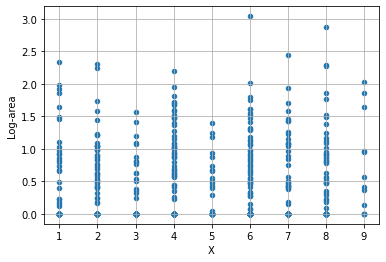

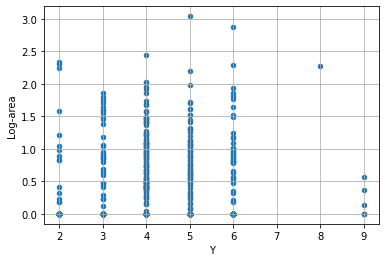

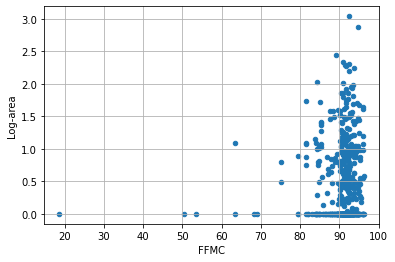

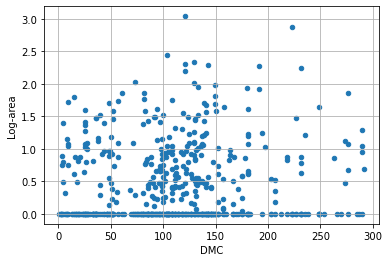

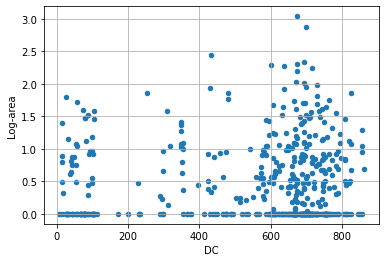

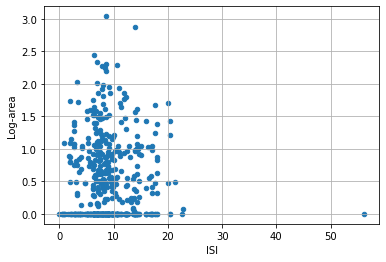

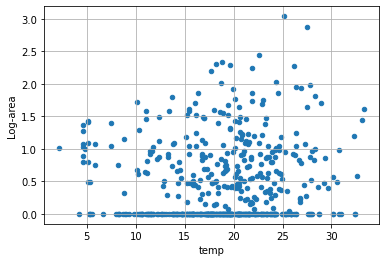

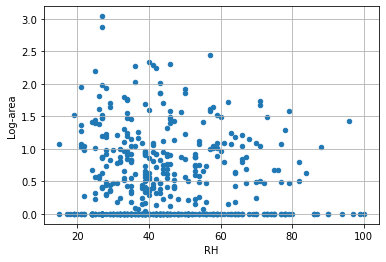

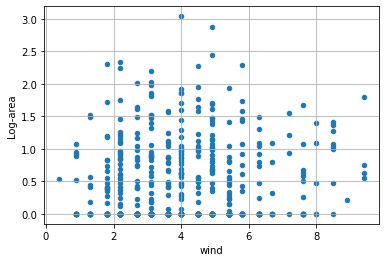

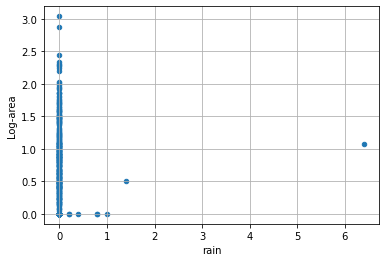

In [6]:
data['Log-area']=np.log10(data['area']+1)

for i in data.describe().columns[:-2]:
    data.plot.scatter(i,'Log-area',grid=True)

# Plot boxplots of how the categorical features (month and day) affect the outcome

<AxesSubplot:title={'center':'Log-area'}, xlabel='day'>

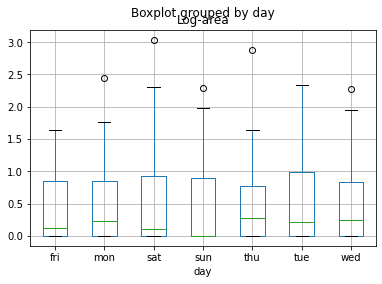

In [7]:
data.boxplot(column='Log-area',by='day')

<AxesSubplot:title={'center':'Log-area'}, xlabel='month'>

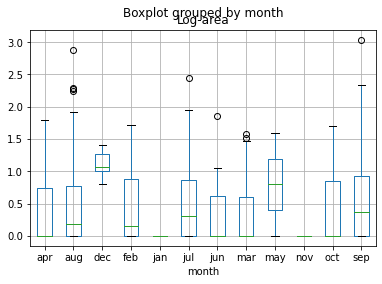

In [8]:
data.boxplot(column='Log-area',by='month')

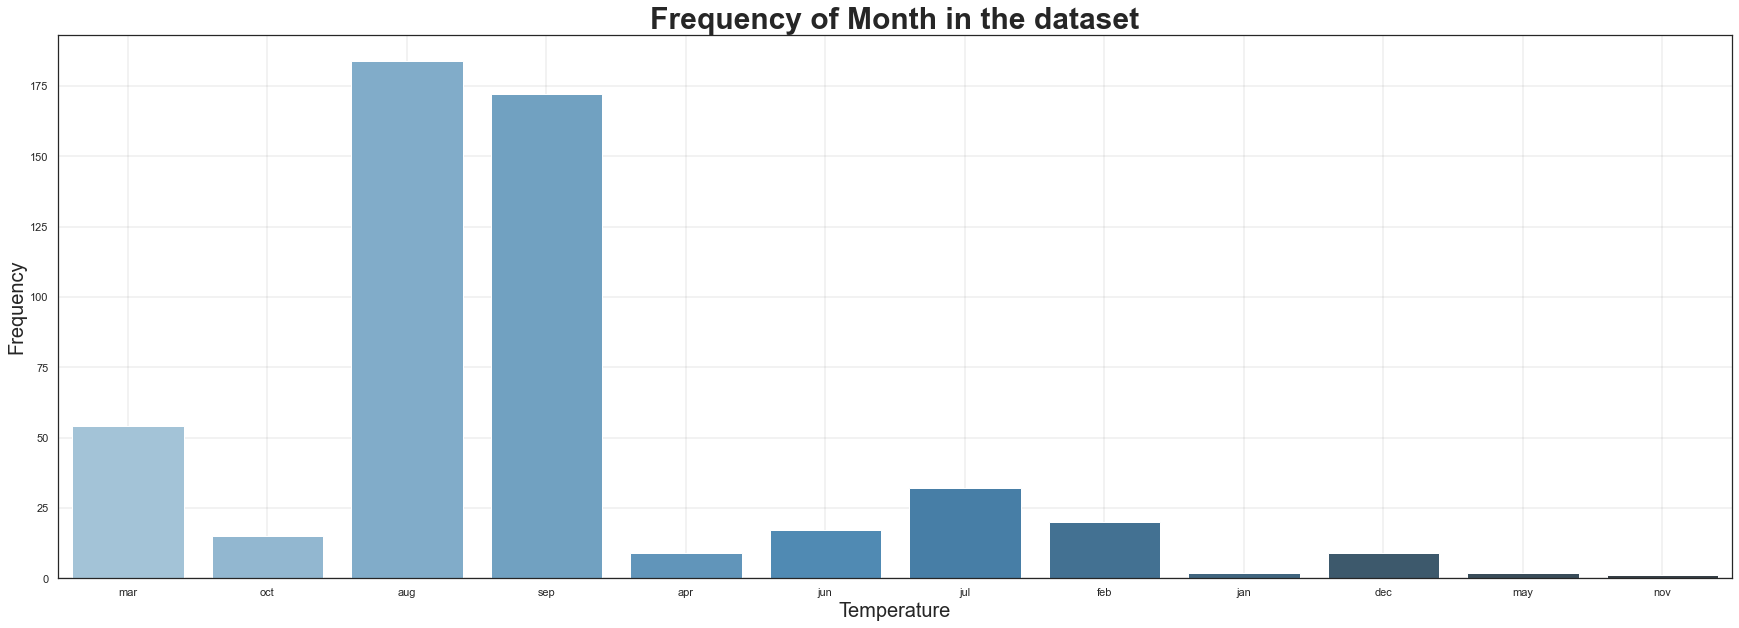

In [109]:
plt.figure(figsize=(30, 10))
sns.set(style="white")
ax = sns.countplot(x="month", data = data, palette="Blues_d")
ax.set_title("Frequency of Month in the dataset", fontdict = {'fontsize':30, 'fontweight':'bold'})
ax.set_xlabel("Temperature", fontdict = {'fontsize':20, 'fontweight': 'medium'})
ax.set_ylabel("Frequency", fontdict = {'fontsize':20, 'fontweight': 'medium'})
ax.grid(which = 'major',color = 'grey', linewidth = 0.2)

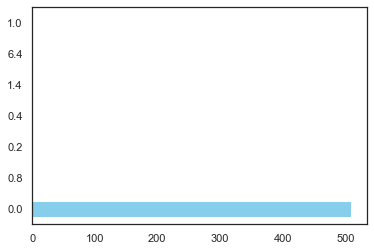

In [110]:
data['rain'].value_counts().plot(kind='barh',color='skyblue')
plt.show()

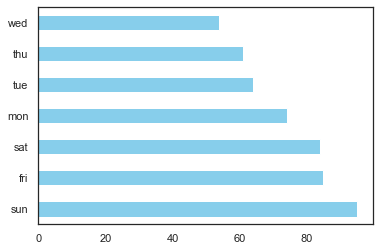

In [111]:
data['day'].value_counts().plot(kind='barh',color='skyblue')
plt.show()

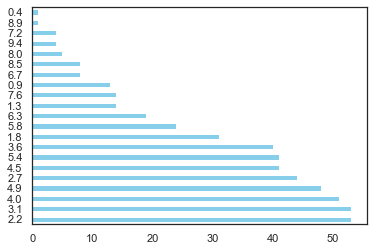

In [112]:
data['wind'].value_counts().plot(kind='barh',color='skyblue')
plt.show()

In [ ]:
# Label Encoder, test/train split, REC function

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [10]:
#Label encoder for the categorical feature (day and month
enc = LabelEncoder()
enc.fit(data['month'])

LabelEncoder()

In [11]:
enc.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [12]:
data['month_encoded']=enc.transform(data['month'])
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7


In [13]:
enc.fit(data['day'])

LabelEncoder()

In [14]:
enc.classes_


array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [15]:
data['day_encoded']=enc.transform(data['day'])
data.head(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded,day_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0.0,1,3
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0.0,1,1
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0.0,1,1
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0.0,11,5
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0.0,11,2


In [16]:
test_size=0.4

In [17]:
X_data=data.drop(['area','Log-area','month','day'],axis=1)
y_data=data['Log-area']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

In [18]:
y_train=y_train.values.reshape(y_train.size,1)


Regression Error Characteristic (REC) estimation




Receiver Operating Characteristic (ROC) curves provide a powerful tool for visualizing and comparing classification results. Regression Error Characteristic (REC) curves generalize ROC curves to regression. REC curves plot the error tolerance on the x-axis versus the percentage of points predicted within the tolerance on the y-axis. The resulting curve estimates the cumulative distribution function of the error. The REC curve visually presents commonly-useds tatistics. The area-over-the-curve (AOC) is a biased estimate of the expected error. The R2 value can be estimated using the ratio of the AOC for a given model to the AOC for the nul-model. Users can quickly assess the relative merits of many regression functions by examining the relative position of their REC curves. The shape of the curve reveals additional information that can be used to guide modeling.

In [19]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [20]:
# Define the max tolerance limit for REC curve x-axis
# For this problem this represents the absolute value of error in the prediction of the outcome i.e. area burned
tol_max=20

Gridsearch

Finding the right parameters for machine learning models is a tricky task! But luckily, Scikit-learn has the functionality of trying a bunch of combinations and see what works best, built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

# 7. Support Vector Regressor (SVR)

In [21]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [22]:
scaler = StandardScaler()

In [23]:
# Parameter grid for the Grid Search
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [24]:
import warnings
warnings.filterwarnings("ignore")


grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=5)
grid_SVR.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [25]:
print("Best parameters obtained by Grid Search:",grid_SVR.best_params_)

Best parameters obtained by Grid Search: {'C': 0.01, 'epsilon': 1, 'kernel': 'rbf'}


In [26]:

a=grid_SVR.predict(X_test)
print("RMSE for Support Vector Regression:",np.sqrt(np.mean((y_test-a)**2)))

RMSE for Support Vector Regression: 0.6155174253148493


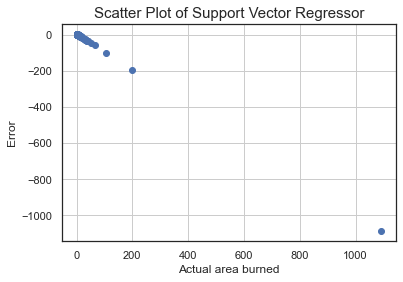

In [102]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.title("Scatter Plot of Support Vector Regressor",fontsize=15)
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,  13., 189.]),
 array([-1088.61320528, -1066.74407395, -1044.87494263, -1023.0058113 ,
        -1001.13667997,  -979.26754864,  -957.39841731,  -935.52928598,
         -913.66015465,  -891.79102333,  -869.921892  ,  -848.05276067,
         -826.18362934,  -804.31449801,  -782.44536668,  -760.57623536,
         -738.70710403,  -716.8379727 ,  -694.96884137,  -673.09971004,
         -651.23057871,  -629.36144739,  -607.49231606,  -585.62318473,
         -563.7540534 ,  -541.88492207,  -520.01579074,  -498.14665942,
         -476.27752809,  -454.40839676,  -432.53926543,  -410.6701341 ,
         -388.80100277,  -366.93187145,  -345.06274012,  -323.19360879,
         -

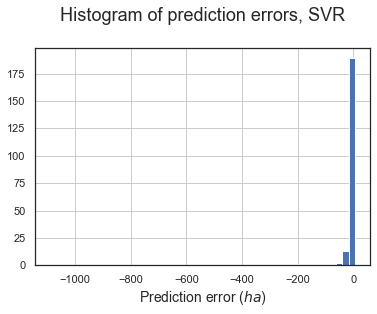

In [103]:
plt.title("Histogram of prediction errors, SVR\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

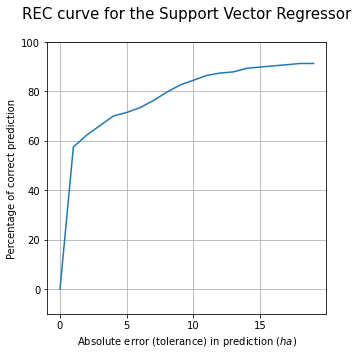

In [29]:
rec_SVR=[]
for i in range(tol_max):
    rec_SVR.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)

# 8. Decision Tree Regressor (Hyper-parameter tuned for highest accuracy)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
tree_model = DecisionTreeRegressor(max_depth=10,criterion='mae')
tree_model.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))


DecisionTreeRegressor(criterion='mae', max_depth=10)

In [32]:


a=tree_model.predict(X_test)
print("RMSE for Decision Tree:",np.sqrt(np.mean((y_test-a)**2)))

RMSE for Decision Tree: 2.6804237037879517


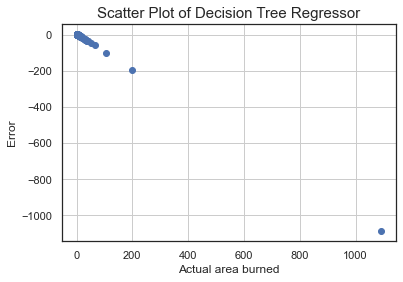

In [104]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.title("Scatter Plot of Decision Tree Regressor",fontsize=15)
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,  13., 189.]),
 array([-1088.61320528, -1066.74407395, -1044.87494263, -1023.0058113 ,
        -1001.13667997,  -979.26754864,  -957.39841731,  -935.52928598,
         -913.66015465,  -891.79102333,  -869.921892  ,  -848.05276067,
         -826.18362934,  -804.31449801,  -782.44536668,  -760.57623536,
         -738.70710403,  -716.8379727 ,  -694.96884137,  -673.09971004,
         -651.23057871,  -629.36144739,  -607.49231606,  -585.62318473,
         -563.7540534 ,  -541.88492207,  -520.01579074,  -498.14665942,
         -476.27752809,  -454.40839676,  -432.53926543,  -410.6701341 ,
         -388.80100277,  -366.93187145,  -345.06274012,  -323.19360879,
         -

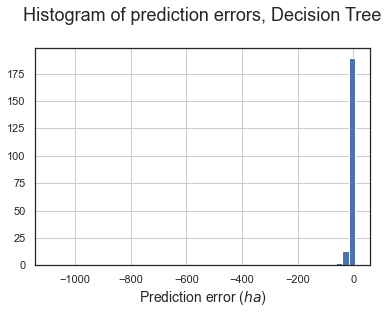

In [105]:
plt.title("Histogram of prediction errors, Decision Tree\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

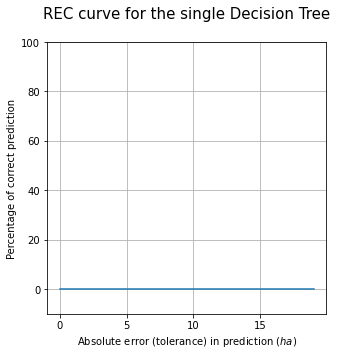

In [35]:
rec_DT=[]
for i in range(tol_max):
    rec_DT.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the single Decision Tree\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_DT)

# 9. Random Forest Regressor (Hyper-parameter tuned for highest accuracy)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
param_grid = {'max_depth': [5,10,15,20,50], 'max_leaf_nodes': [2,5,10], 'min_samples_leaf': [2,5,10],
             'min_samples_split':[2,5,10]}
grid_RF = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=0,cv=5)
grid_RF.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [38]:
print("Best parameters obtained by Grid Search:",grid_RF.best_params_)

Best parameters obtained by Grid Search: {'max_depth': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [39]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_depth': [5,10,15,20,50], 
              'max_leaf_nodes': [2,5,10], 
              'min_samples_leaf': [2,5,10],
              'min_samples_split':[2,5,10]}
grid_RF = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=0,cv=5)
grid_RF.fit(X_train,y_train)
a=grid_RF.predict(X_test)
rmse_rf=np.sqrt(np.mean((y_test-a)**2))
print("RMSE for Random Forest:",rmse_rf)

RMSE for Random Forest: 0.5673316386872838


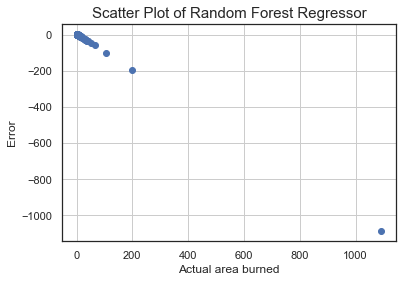

In [106]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.title("Scatter Plot of Random Forest Regressor",fontsize=15)
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,  13., 189.]),
 array([-1088.61320528, -1066.74407395, -1044.87494263, -1023.0058113 ,
        -1001.13667997,  -979.26754864,  -957.39841731,  -935.52928598,
         -913.66015465,  -891.79102333,  -869.921892  ,  -848.05276067,
         -826.18362934,  -804.31449801,  -782.44536668,  -760.57623536,
         -738.70710403,  -716.8379727 ,  -694.96884137,  -673.09971004,
         -651.23057871,  -629.36144739,  -607.49231606,  -585.62318473,
         -563.7540534 ,  -541.88492207,  -520.01579074,  -498.14665942,
         -476.27752809,  -454.40839676,  -432.53926543,  -410.6701341 ,
         -388.80100277,  -366.93187145,  -345.06274012,  -323.19360879,
         -

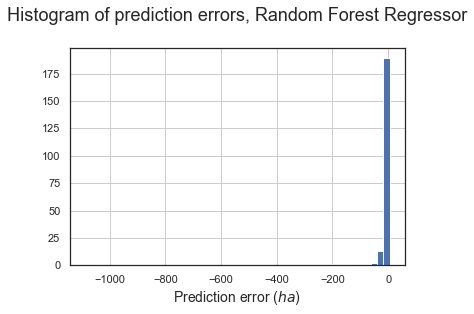

In [107]:
plt.title("Histogram of prediction errors, Random Forest Regressor\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

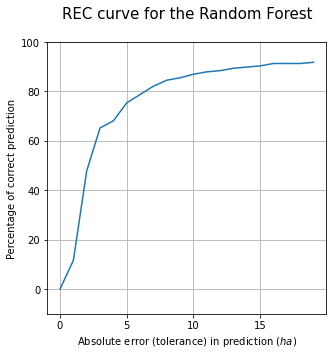

In [42]:
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_RF)

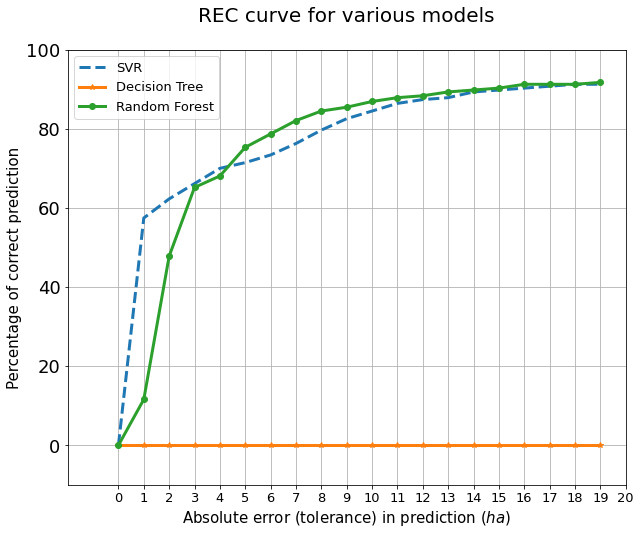

In [43]:
plt.figure(figsize=(10,8))
plt.title("REC curve for various models\n",fontsize=20)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)",fontsize=15)
plt.ylabel("Percentage of correct prediction",fontsize=15)
plt.xticks([i for i in range(0,tol_max+1,1)],fontsize=13)
plt.ylim(-10,100)
plt.xlim(-2,tol_max)
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)
plt.plot(range(tol_max),rec_SVR,'--',lw=3)
plt.plot(range(tol_max),rec_DT,'*-',lw=3)
plt.plot(range(tol_max),rec_RF,'o-',lw=3)
#plt.plot(range(tol_max),rec_NN,'k-',lw=3)
plt.legend(['SVR','Decision Tree','Random Forest'],fontsize=13)

Results:
1. Linear Regression: Performance of Linear Regression R^2 metric 0.51
2. MLP Regressor Model: Performance of MLP Regression Model R^2 metric 0.50639
3. Decision Tree Regressor: R2 Score = -5.82
4. Random Forest Regressor: R2 Score = -7.42
5. Logistic Regression: Logistic Regression Accuracy, 95.58011%
6. Neural Network Classifier: Neural Network Classifier Accuracy, 92.81768%
7. Support Vector Regressor with GRIDCV: RMSE for Support Vector Regression: 0.615
8. Decision Tree Regressor with GRIDCV: RMSE for Decision Tree: 2.68
9. Random Forest Regressor with GRIDCV: RMSE for Random Forest: 0.56

    